<a href="https://colab.research.google.com/github/siddheshpednekar/dlpracts/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras import layers, Input, Model
from keras.layers import Dense
from keras.datasets import mnist
import numpy as np
from keras.utils.vis_utils import plot_model

In [ ]:
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation ="relu")(input_img)
decoded = Dense(784, activation ="sigmoid")(encoded)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


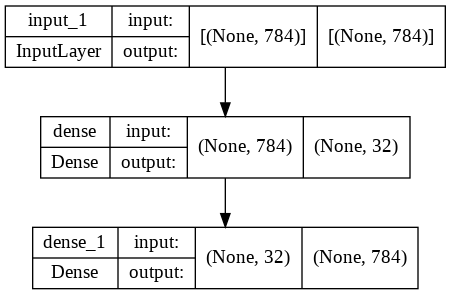

In [ ]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input,decoder_layer(encoded_input))
autoencoder.compile(optimizer="adam",loss="binary_crossentropy")
autoencoder.summary()
plot_model(autoencoder, to_file ="model_plot.png",show_shapes=True, show_layer_names=True)

In [ ]:
from re import X
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)


11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [ ]:
from ssl import DER_cert_to_PEM_cert
autoencoder.fit(X_train, X_train, epochs=10, batch_size=256, shuffle=True, validation_data=(X_test, X_test))
encoded_imgs= encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/10
235/235 [==============================] - 3s 12ms/step - loss: 0.2745 - val_loss: 0.1894
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1708 - val_loss: 0.1538
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1444 - val_loss: 0.1337
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1286 - val_loss: 0.1214
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1184 - val_loss: 0.1133
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1113 - val_loss: 0.1072
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1061 - val_loss: 0.1031
Epoch 8/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1023 - val_loss: 0.0996
Epoch 9/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0996 - val_loss: 0.0975
Epoch 10/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0977 - val_lo